## ML - Task1- Measures of Descriptive statistics-Central Tendency, spread
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it usin
g
 Mean Funct,ion
Percentile me,thod
IQR(Inter quartile range me,thod)
Normal distri,bution
Zscore
 method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [2]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [54]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [43]:
M= df.price_per_sqft.mean()
M

7920.336742424242

In [44]:
S= df.price_per_sqft.std()
S

106727.16032810867

<Axes: xlabel='price_per_sqft', ylabel='Count'>

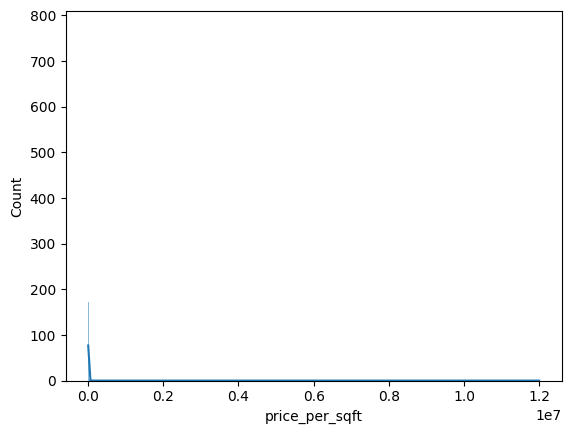

In [48]:
sns.histplot(data = df,x = df.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

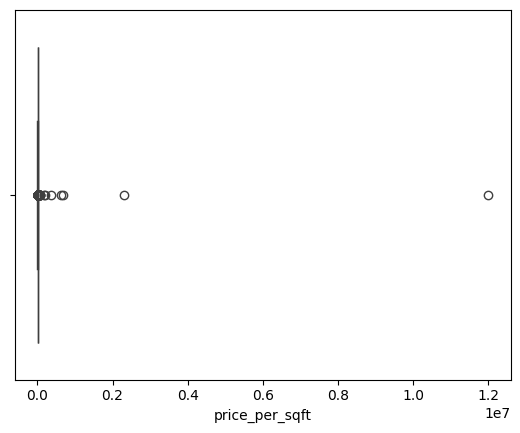

In [62]:
sns.boxplot(data = df,x = df.price_per_sqft)

## Mean Method

In [51]:
upper_limit =M+(3*S)
lower_limit =M-(3*S)

print(upper_limit,lower_limit)

328101.8177267502 -312261.14424190175


In [82]:
df[(df.price_per_sqft <= lower_limit) | (df.price_per_sqft >= upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [83]:
new_df = df[(df.price_per_sqft >= lower_limit) & (df.price_per_sqft <= upper_limit)]
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

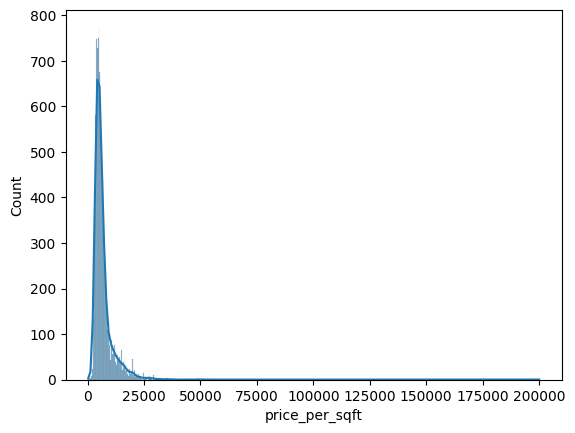

In [84]:
sns.histplot(data = new_df,x = new_df.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

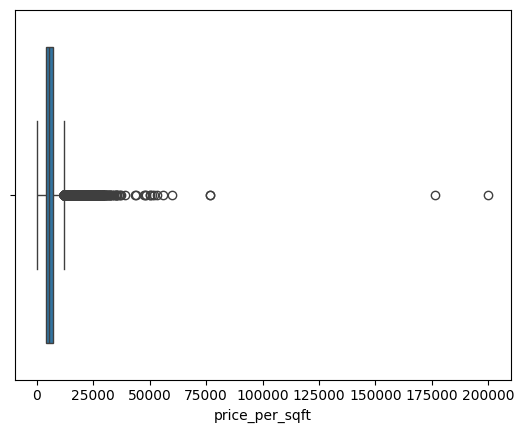

In [85]:
sns.boxplot(data = new_df,x = new_df.price_per_sqft)

## IQR Method

In [58]:
Q1= df.price_per_sqft.quantile(0.25)
Q3= df.price_per_sqft.quantile(0.75)
IQR= Q3 - Q1

(Q1,Q3)

(4267.0, 7317.0)

In [59]:
IQR

3050.0

In [67]:
upperlimit= Q3+ (1.5*IQR)
lowerlimit= Q1- (1.5*IQR)

(upperlimit,lowerlimit)

(11892.0, -308.0)

In [86]:
df[(df.price_per_sqft <= lowerlimit) | (df.price_per_sqft >= upperlimit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [87]:
newdf = df[(df.price_per_sqft >= lowerlimit) & (df.price_per_sqft <= upperlimit)]
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

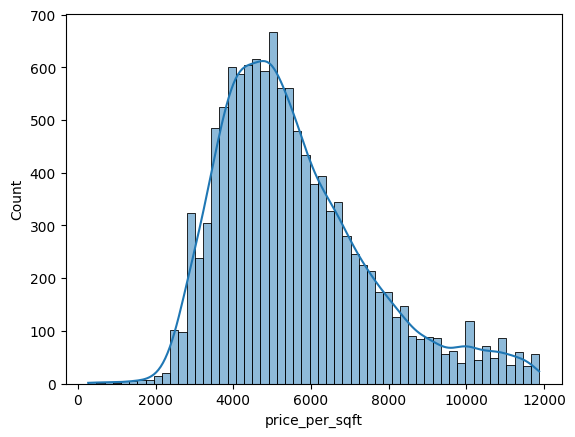

In [88]:
sns.histplot(data = newdf,x = newdf.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

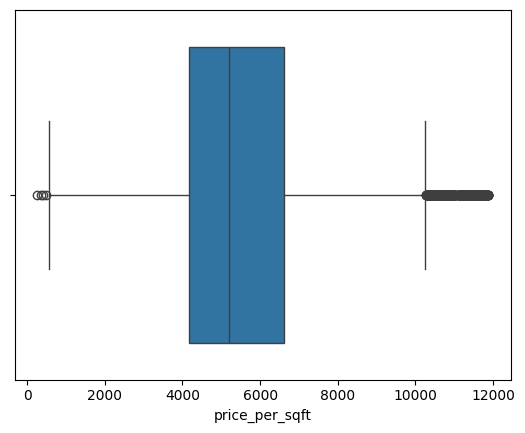

In [89]:
sns.boxplot(data = newdf,x = newdf.price_per_sqft)

## Percentile Method

In [77]:
up_limit =df.price_per_sqft.quantile(0.95)
low_limit =df.price_per_sqft.quantile(0.05)

(up_limit,low_limit)

(15312.099999999984, 3107.8500000000004)

In [90]:
df[(df.price_per_sqft <= low_limit) | (df.price_per_sqft >= up_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [91]:
dfnew = df[(df.price_per_sqft >= low_limit) & (df.price_per_sqft <= up_limit)]
dfnew

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: xlabel='price_per_sqft', ylabel='Count'>

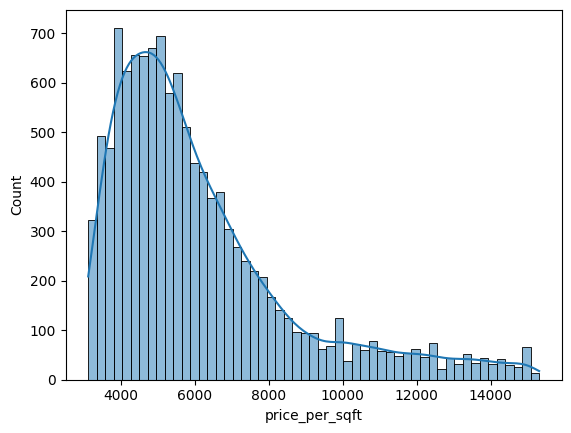

In [92]:
sns.histplot(data = dfnew,x = dfnew.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

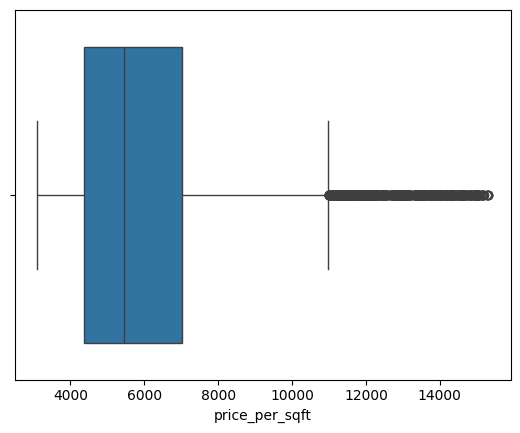

In [93]:
sns.boxplot(data = dfnew,x = dfnew.price_per_sqft)

## Normal Distribution Method

In [94]:
ul =M+(3*S)
ll =M-(3*S)

print(ul,ll)

328101.8177267502 -312261.14424190175


In [95]:
df[(df.price_per_sqft <= ll) | (df.price_per_sqft >= ul)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [96]:
nor_df = df[(df.price_per_sqft >= ll) & (df.price_per_sqft <= ul)]
nor_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

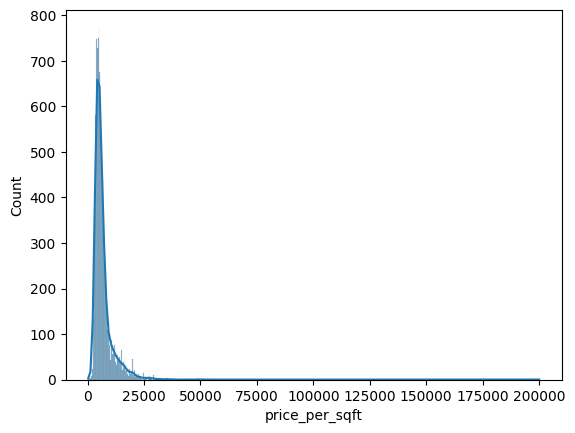

In [97]:
sns.histplot(data = nor_df,x = nor_df.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

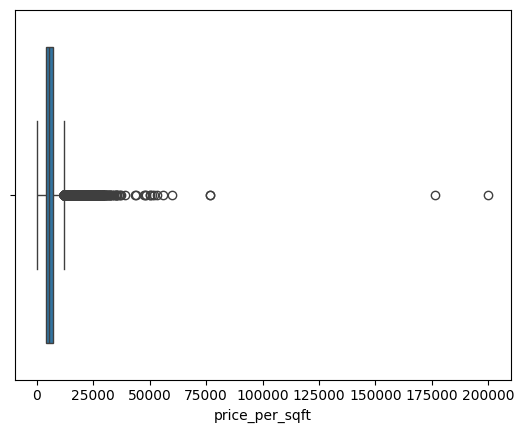

In [98]:
sns.boxplot(data = nor_df,x = nor_df.price_per_sqft)

## Z-Score Method

In [103]:
z_df =df.copy()
z_df['ZScore'] = (df.price_per_sqft - M)/S
z_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [105]:
z_df[(z_df.ZScore <= -3) | (z_df.ZScore >= +3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [112]:
z_new= z_df[(z_df.ZScore >= -3) & (z_df.ZScore <= +3)]
z_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


<Axes: xlabel='price_per_sqft', ylabel='Count'>

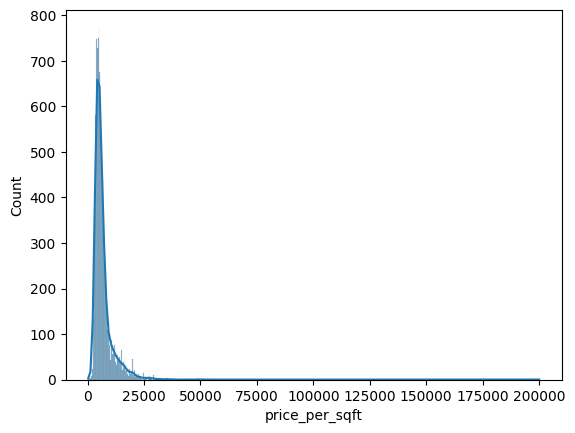

In [113]:
sns.histplot(data = z_new,x = z_new.price_per_sqft, kde = True)

<Axes: xlabel='price_per_sqft'>

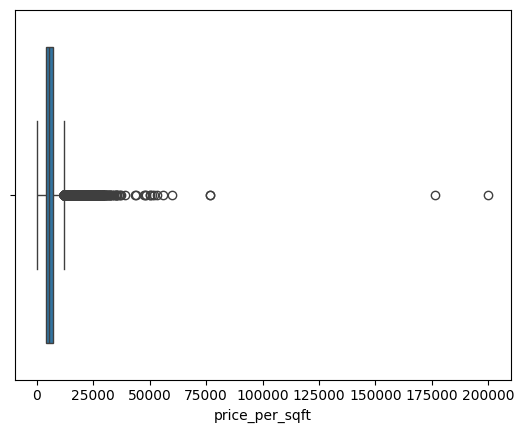

In [119]:
sns.boxplot(data = z_new,x = z_new.price_per_sqft)

##  box plot for all the numerical columns

<Axes: xlabel='total_sqft'>

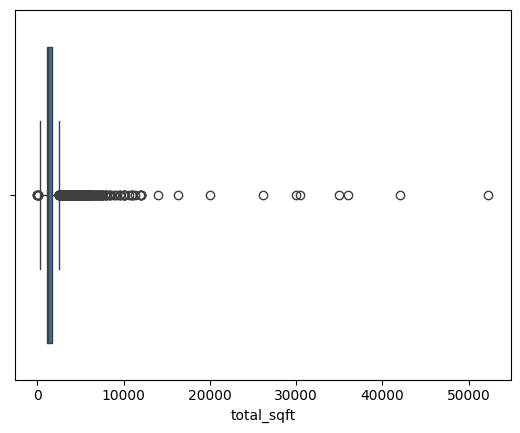

In [120]:
sns.boxplot(data = df,x = df.total_sqft)

<Axes: xlabel='bath'>

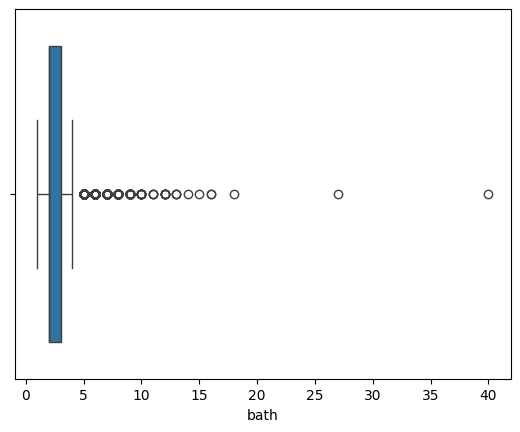

In [121]:
sns.boxplot(data = df,x = df.bath)

<Axes: xlabel='price'>

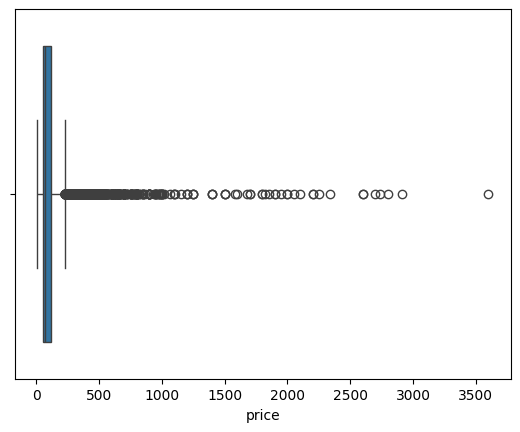

In [122]:
sns.boxplot(data = df,x = df.price)

<Axes: xlabel='bhk'>

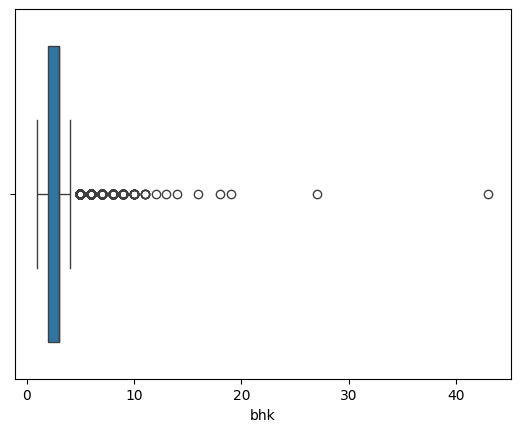

In [123]:
sns.boxplot(data = df,x = df.bhk)

##  Correlation between all the numerical columns

#### Before Removing outliers

In [146]:
num_df = df.drop(columns=['location', 'size'])
corr= num_df.corr()
corr

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


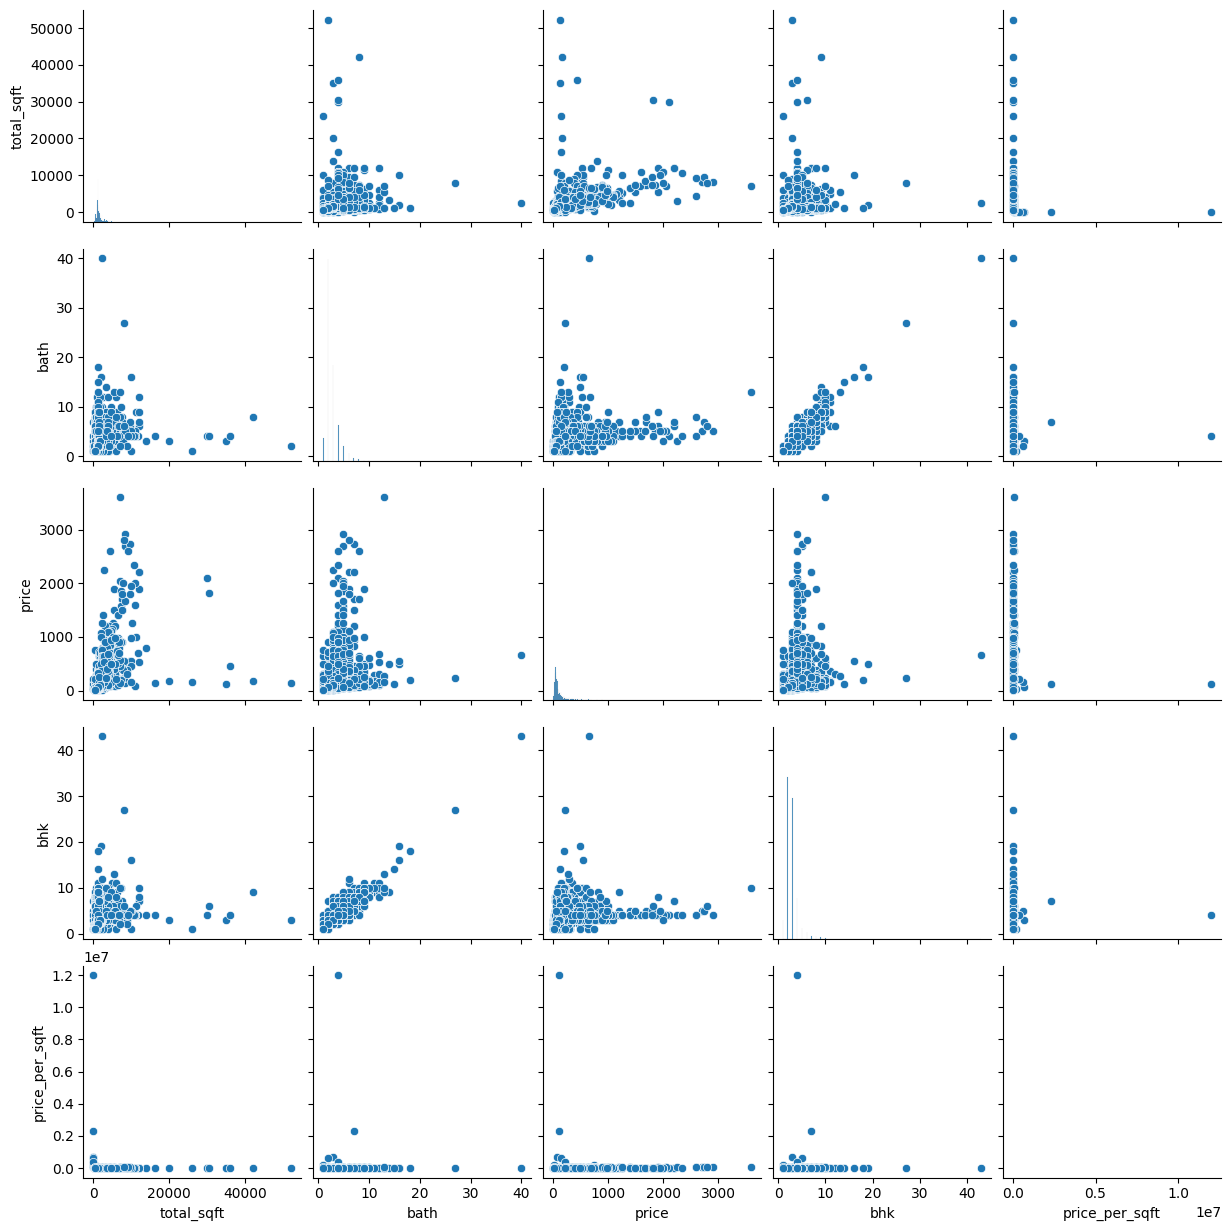

In [147]:
sns.pairplot(num_df)
plt.show()

## Heat Map

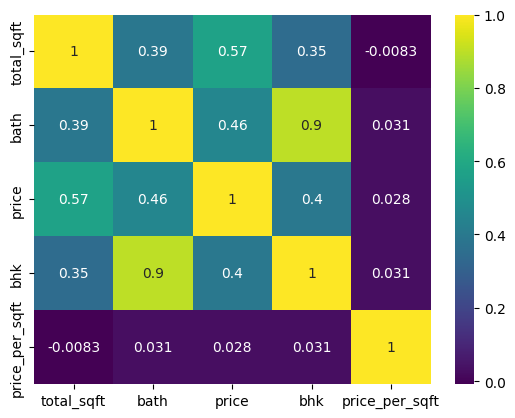

In [148]:
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

#### After Removing Outliers

In [151]:
numdf = newdf.drop(columns=['location', 'size'])
cor= numdf.corr()
cor

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.455416,0.660443,0.426239,0.136414
bath,0.455416,1.000000,0.571890,0.881677,0.348669
price,0.660443,0.571890,1.000000,0.501315,0.612102
bhk,0.426239,0.881677,0.501315,1.000000,0.303220
price_per_sqft,0.136414,0.348669,0.612102,0.303220,1.000000


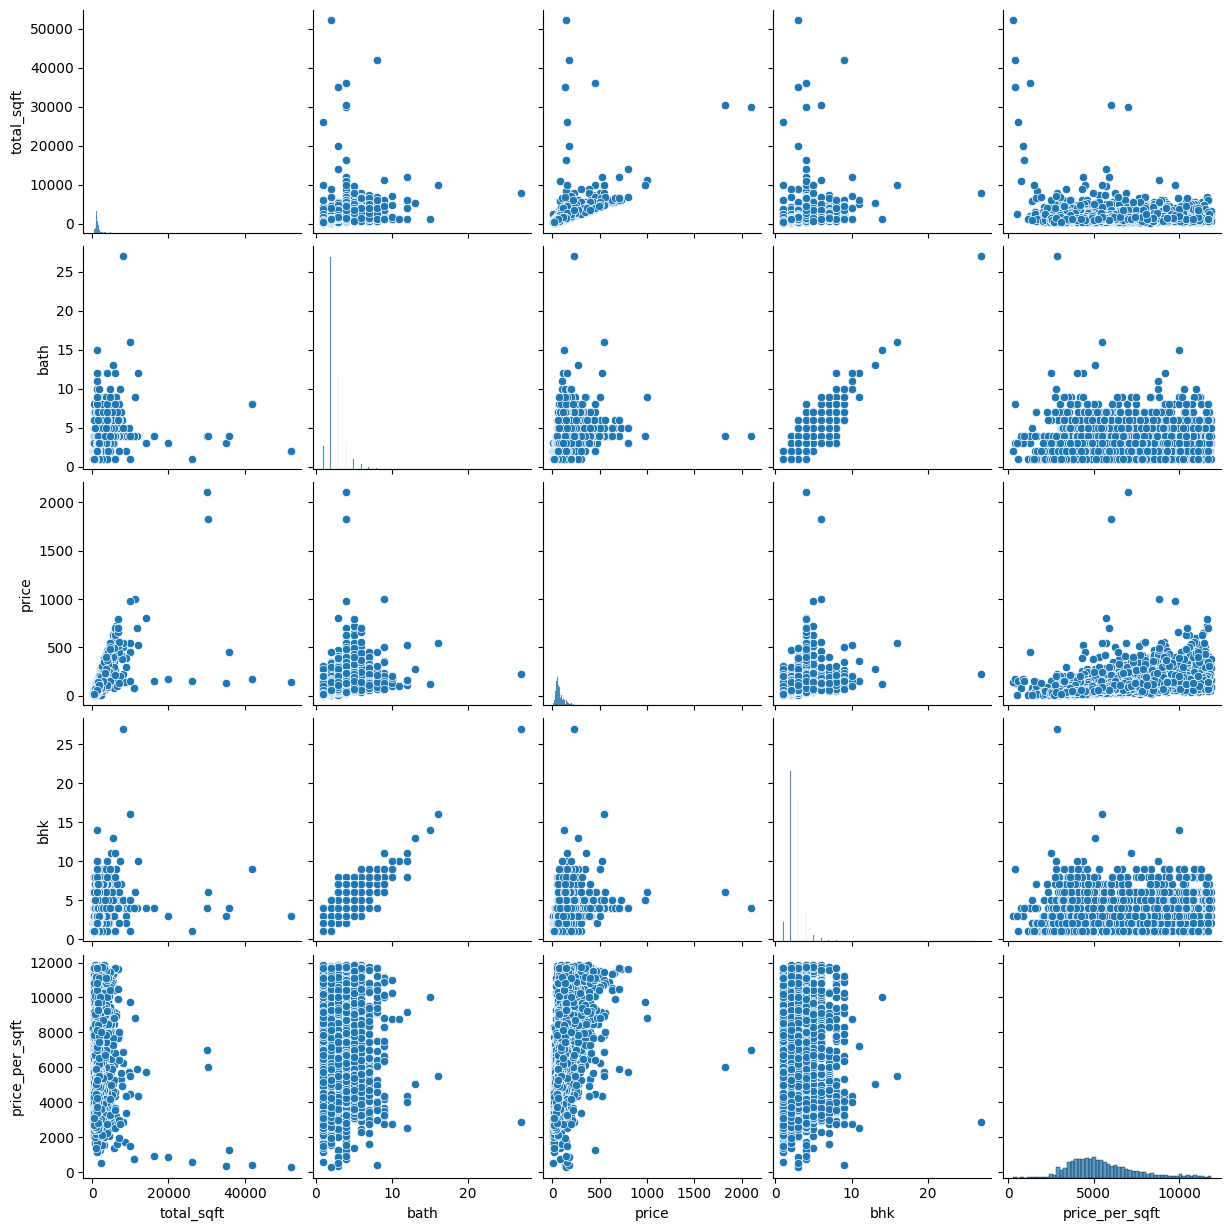

In [152]:
sns.pairplot(numdf)
plt.show()

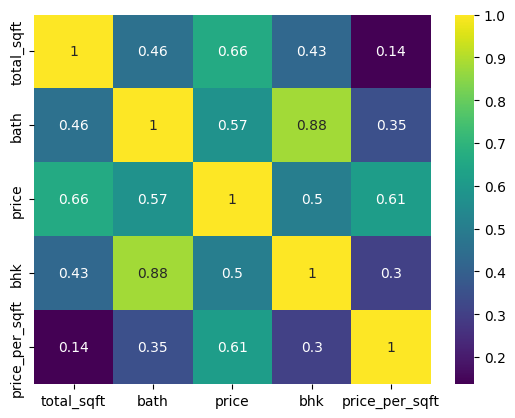

In [153]:
sns.heatmap(cor, annot=True, cmap="viridis")
plt.show()